# <span style="font-size:30px">Projet : Optimisation de la gestion des données d'une boutique</span>
## <span style="font-size:30px">Réalisé par : FOGUE ARSENE MAGLOIRE</span>

<h2>Table des matières</h2>

<ol>
  <li><a href="#etape1">Étape 1 : Chargement et Exploration des Données</a></li>
  <li><a href="#etape2">Étape 2 : Nettoyage et Préparation</a></li>
  <li><a href="#etape3">Étape 3 : Jointure des Données</a></li>
  <li><a href="#etape4">Étape 4 : Analyse du Chiffre d’Affaires</a></li>
  <li><a href="#etape5">Étape 5 : Analyse des Prix et Détection des Outliers</a></li>
</ol>


<h2 id="etape1">Étape 1 : Chargement et Exploration des Données</h2>

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
erp = pd.read_excel('erp.xlsx')

C:\Users\Tamga Nissi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
liaison = pd.read_excel('liaison.xlsx')

C:\Users\Tamga Nissi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
web = pd.read_excel('web.xlsx')

C:\Users\Tamga Nissi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
print(erp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None


In [6]:
print(liaison.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None


In [7]:
print(web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

<h2 id="etape2">Étape 2 : Nettoyage et Préparation</h2>

---

In [8]:
web = web[web['post_type'] == 'product']

In [9]:
erp.drop_duplicates(subset=['product_id'], inplace=True)
liaison.drop_duplicates(subset=['product_id'], inplace=True)
web.drop_duplicates(subset=['sku'], inplace=True)

In [10]:
web.rename(columns={'sku': 'id_web'}, inplace=True)

<h2 id="etape3">Étape 3 : Jointure des Données</h2>

---

In [11]:
merge_intermediaire = pd.merge(erp, liaison, on='product_id', how='left')

In [12]:
df_final = pd.merge(merge_intermediaire, web, on='id_web', how='left')

In [13]:
non_matching = df_final[df_final['id_web'].isna()]
print(f"Nombre de produits non référencés sur le web : {len(non_matching)}")

Nombre de produits non référencés sur le web : 91


<h2 id="etape4">Étape 4 : Analyse du Chiffre d’Affaires</h2>

---

In [14]:
df_final['chiffre_affaires'] = df_final['price'] * df_final['total_sales']

In [15]:
ca_total = df_final['chiffre_affaires'].sum()
print(f"Chiffre d'affaires total : {ca_total:.2f} €")

Chiffre d'affaires total : 70568.60 €


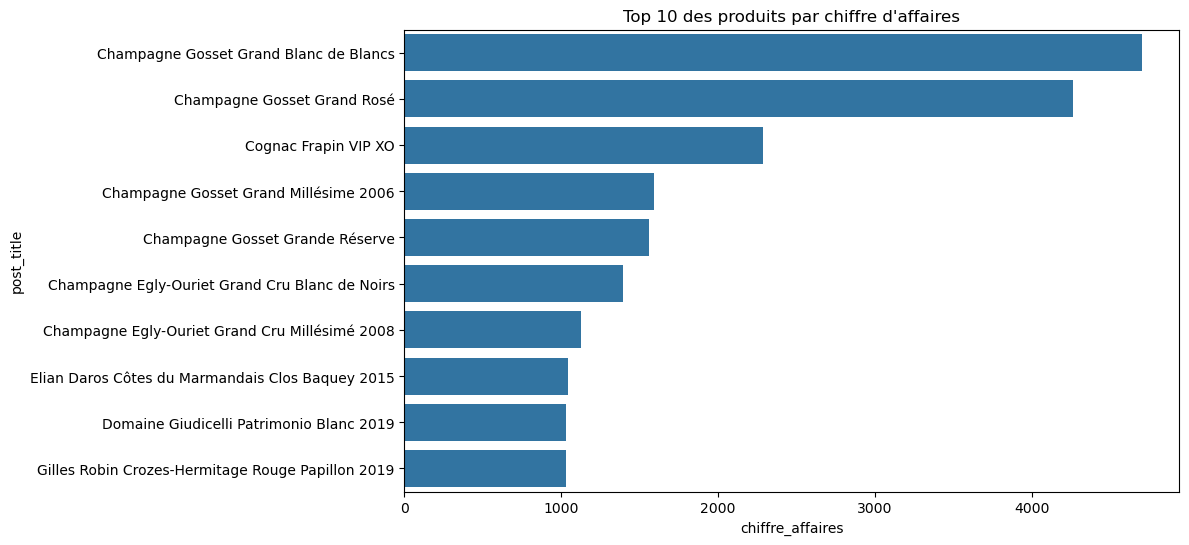

In [16]:
top_10 = df_final.sort_values(by='chiffre_affaires', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10, x='chiffre_affaires', y='post_title')
plt.title('Top 10 des produits par chiffre d\'affaires')
plt.show()

<h2 id="etape5">Étape 5 : Analyse des Prix et Détection des Outliers</h2>

---

Visualisation de la distribution des prix

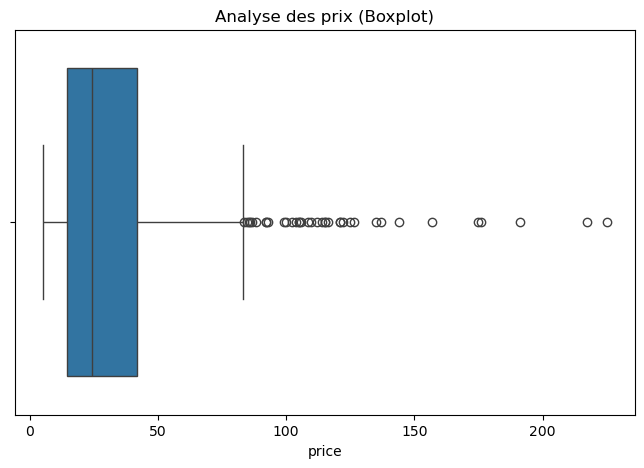

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_final['price'])
plt.title('Analyse des prix (Boxplot)')
plt.show()

In [18]:
q1 = df_final['price'].quantile(0.25)
q3 = df_final['price'].quantile(0.75)
iqr = q3 - q1

Calcul des valeurs aberrantes par la méthode Écart Interquartile (IQR)

In [19]:
q1 = df_final['price'].quantile(0.25)
q3 = df_final['price'].quantile(0.75)
iqr = q3 - q1

borne_haute = q3 + 1.5 * iqr
outliers = df_final[df_final['price'] > borne_haute]

print(f"Nombre de produits considérés comme outliers (prix atypiques) : {len(outliers)}")
print(outliers[['post_title', 'price']].sort_values(by='price', ascending=False))

Nombre de produits considérés comme outliers (prix atypiques) : 37
                                            post_title  price
208     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0
460     David Duband Charmes-Chambertin Grand Cru 2014  217.5
635  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3
227                               Cognac Frapin VIP XO  176.0
598                Camille Giroud Clos de Vougeot 2016  175.0
230  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
242         Pierre Jean Villa Côte Rôtie Fongeant 2017  144.0
411  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0
697             Champagne Gosset Célébris Vintage 2007  135.0
210     Champagne Egly-Ouriet Grand Cru Blanc de Noirs  126.5
556  Domaine Weinbach Gewurztraminer Grand Cru Furs...  124.8
651  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  122.0
712  Domaine des Comtes Lafon Volnay 1er Cru Champa...  121.0
709  Domaine des Comtes Lafon Volnay 1er Cru Santen...  121.0
703

Nous avons détecté 37 outliers ou valeurs aberrantes (valeurs supérieures à 83 €). Après analyse des libellés produits, il s'agit de produits haut de gamme (Champagnes, Cognacs, Grands vins).

Recommandation : Ces données sont valides et ne doivent surtout pas être supprimées. Elles représentent un segment de marché spécifique (Luxe) qui contribue au chiffre d'affaires. 

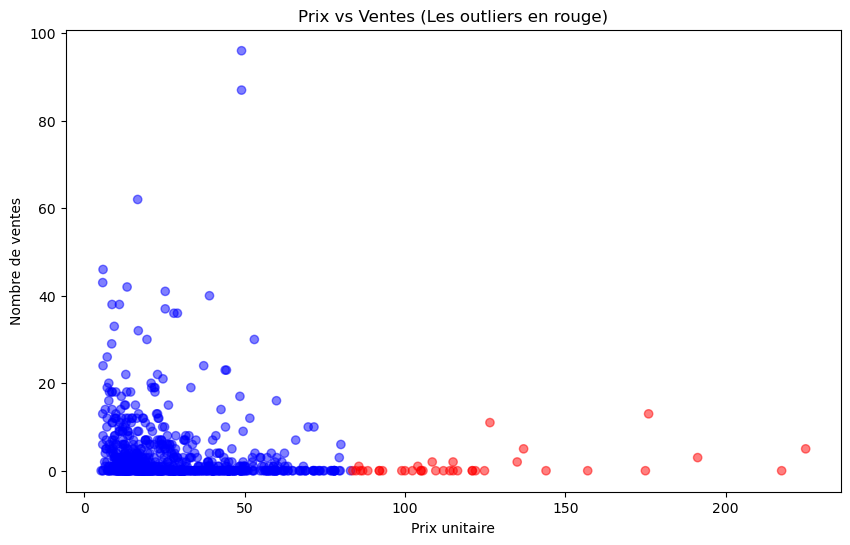

In [20]:
import matplotlib.pyplot as plt

# créons une colonne couleur : rouge si outlier, bleu sinon
df_final['couleur'] = ['red' if x > borne_haute else 'blue' for x in df_final['price']]

plt.figure(figsize=(10, 6))
plt.scatter(df_final['price'], df_final['total_sales'], c=df_final['couleur'], alpha=0.5)
plt.title('Prix vs Ventes (Les outliers en rouge)')
plt.xlabel('Prix unitaire')
plt.ylabel('Nombre de ventes')
plt.show()

Et pour finir notre projet en beauté, nous pouvons visualiser ici les valeurs aberraantes qui representent des données tres essentielles pour la boutique,
car elles renseignent sur la vente des produits de haut gamme. donc ici ces valeurs aberrantes ne représentent pas des erreurs mais plutot des informations crutiales pour la boutique